# Analyzing Health Factors - Predicting Diabetes and Age

## Preparations

### Import libraries

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

### Download dataset

In [2]:
diabetes_health_indicators = pd.read_csv('datasets/diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_health_indicators.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Dataset Column Summary**
 - Diabetes: Whether the individual has no Diabetes (0), prediabetes (1), or diabetes (2)
 - HighBP: Whether the individual has high blood pressure (1 or 0)
 - HighChol: Whether the individual has high cholesterol (1 or 0)
 - CholCheck: Whether the individual had their cholesterol checked in the past 5 years (1 or 0)
 - BMI: Body Mass Index, a measure of body fat based on height and weight
 - Smoker: Whether the individual is a current smoker (1 or 0)
 - Stroke: Whether the individual has ever had a stroke (1 or 0)
 - HeartDiseaseorAttack: Whether the individual has ever had coronary heart disease or a heart attack (1 or 0)
 - PhysActivity: Whether the individual engaged in physical activity in the past 30 days (1 or 0)
 - Fruits: Whether the individual consumes fruits at least once per day (1 or 0)
 - Veggies: Whether the individual consumes vegetables at least once per day (1 or 0)
 - HvyAlcoholConsump: Heavy alcohol consumption indicator (1 or 0)
 - AnyHealthcare: Whether the individual has any form of healthcare coverage (1 or 0)
 - NoDocbcCost: Whether the individual could not see a doctor in the past year because of cost (1 or 0)
 - GenHlth: General health status reported on a 1–5 scale (1 = excellent, 5 = poor)
 - MentHlth: Number of days mental health was not good during the past 30 days
 - PhysHlth: Number of days physical health was not good during the past 30 days
 - DiffWalk: Whether the individual has serious difficulty walking or climbing stairs (1 or 0)
 - Sex: Female (0) or Male (1)
 - Age: Age group of the individual (13-level group)
    - 1 = 18-24
    - ...
    - 9 = 60-64
    - ...
    - 13 = 80 or older
 - Education: Education level attained: Education level
    - 1 = Never attended school or only kindergarten
    - 2 = Grades 1 through 8 (Elementary)
    - 3 = Grades 9 through 11 (Some high school)
    - 4 = Grade 12 or GED (High school graduate)
    - 5 = College 1 year to 3 years (Some college or technical school)
    - 6 = College 4 years or more (College graduate)
 - Income: Income category of the individual
    - 1 = less than $10,000
    - ...
    - 5 = less than $35,000
    - ...
    - 8 = $75,000 or more

In [3]:
diabetes_health_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Number of no diabetes, prediabetes, and diabetes cases
print(diabetes_health_indicators['Diabetes_012'].value_counts(0))

# Percentage of no diabetes, prediabetes, and diabetes cases
print(diabetes_health_indicators['Diabetes_012'].value_counts(1))

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [5]:
diabetes_health_indicators.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


The dataset is cleaned, with no empties though it is imbalanced.
We observe that we have not many rows for prediabetes, comparably, so for this project, we will drop the rows for those labeled as prediabetic, and will be building a binary classifier that predicts whether or not a person will develop diabetes.

### Data Cleaning and Preparation

First, we get rid of the most minor class prediabetes and aim our project to build binary classification.

In [6]:
# Remove individuals with prediabetes
diabetes_health_indicators = diabetes_health_indicators[diabetes_health_indicators['Diabetes_012'] != 1.0]
# Binary re-encode `Diabetes_012` column
diabetes_health_indicators['Diabetes_012'] = diabetes_health_indicators['Diabetes_012'].replace({2.0:1.0})
# Finally, rename column for clarity
diabetes_health_indicators.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)

To be sure our model is not biased by major class we have to balance the dataset such that the ratio of individuals with and without diabetes is 50/50.

In [8]:
# Separate the dataset into diabetic and nondiabetic individuals
diabetics = diabetes_health_indicators[diabetes_health_indicators['Diabetes'] == 1] # Dataset of diabetic individuals
nondiabetics = diabetes_health_indicators[diabetes_health_indicators['Diabetes'] == 0] # Dataset of nondiabetic individuals

# Undersample nondiabetic individuals + keep all diabetic individuals
nondiabetics_sampled = nondiabetics.sample(n=len(diabetics), random_state=42) 
diabetes_data_balanced = pd.concat([diabetics, nondiabetics_sampled])

# Shuffle the combined dataset + verify balance
diabetes_data_balanced = diabetes_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(diabetes_data_balanced['Diabetes'].value_counts())

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64


And also we can drop some of features for reasons irrelevance, at least by author's opinion.

In [9]:
# Drop unimportant features
drop_columns = ['CholCheck', 'NoDocbcCost', 'Education', 'Income']
diabetes_data_balanced = diabetes_data_balanced.drop(labels=drop_columns, axis=1)

In [10]:
# Final preview before training
diabetes_data_balanced.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,5.0
1,1.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,0.0,30.0,1.0,1.0,8.0
2,1.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,4.0,7.0,1.0,1.0,0.0,10.0
3,1.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,15.0,0.0,1.0,10.0
4,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0


## Model 1 - Binary classification for prediction diabetes

### Pre-processing

In [11]:
# Select training features
remove_cols = ['Diabetes']
train_features = [x for x in diabetes_data_balanced.columns if x not in remove_cols]
print("Number of training features:", len(train_features))

Number of training features: 17


In [12]:
X = diabetes_data_balanced[train_features].values
y = diabetes_data_balanced['Diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Convert into tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).view(-1,1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).view(-1,1)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (56553, 17)
Testing Shape: (14139, 17)


### Logistic Regression Baseline

In [15]:
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

LogisticRegression()

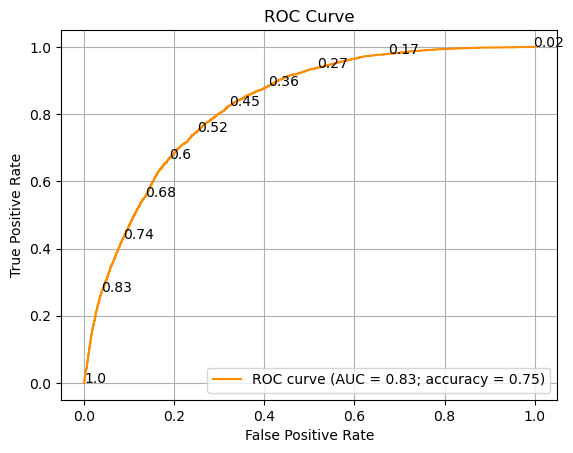

In [16]:
# Evaluate logistic regression with ROC_AUC and accuracy
linear_test_predictions = linear_model.predict(X_test)
linear_test_predictions_prob = linear_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, linear_test_predictions_prob[:,1])

roc_auc = roc_auc_score(y_test, linear_test_predictions_prob[:,1])
accuracy = accuracy_score(y_test, linear_test_predictions)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f}; accuracy = {:.2f})'.format(roc_auc, accuracy))
idx = list(range(len(thresholds)))[1::(len(thresholds) // 10)]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()


### Build the Neural Network Architecture

In [36]:
torch.manual_seed(42)

class DiabetesClassifier(nn.Module):
    def __init__(self, input_size=17):
        super(DiabetesClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)

        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.dropout1(x)
        x = self.relu2(self.layer2(x))
        x = self.dropout2(x)
        x = self.relu3(self.layer3(x))
        x = self.dropout3(x)
        x = self.sigmoid(self.output(x))
        return x
    
# Initialize loss function + optimizer
model = DiabetesClassifier()
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Training Loop

In [37]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(X_train_tensor)
    BCELoss = criterion(predictions, y_train_tensor)
    BCELoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        # Track the training accuracy
        predicted_labels = (predictions >= 0.5).int()
        auc = roc_auc_score(y_train, predictions.detach().numpy())
        accuracy = accuracy_score(y_train, predicted_labels)
        print(f'Epoch [{epoch+1}/{num_epochs}], BCELoss: {BCELoss.item():.4f}, ROC_AUC: {auc.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch [100/1000], BCELoss: 0.5025, ROC_AUC: 0.8313, Accuracy: 0.7563
Epoch [200/1000], BCELoss: 0.4967, ROC_AUC: 0.8356, Accuracy: 0.7597
Epoch [300/1000], BCELoss: 0.4924, ROC_AUC: 0.8389, Accuracy: 0.7623
Epoch [400/1000], BCELoss: 0.4886, ROC_AUC: 0.8418, Accuracy: 0.7655
Epoch [500/1000], BCELoss: 0.4865, ROC_AUC: 0.8436, Accuracy: 0.7654
Epoch [600/1000], BCELoss: 0.4852, ROC_AUC: 0.8443, Accuracy: 0.7660
Epoch [700/1000], BCELoss: 0.4843, ROC_AUC: 0.8452, Accuracy: 0.7662
Epoch [800/1000], BCELoss: 0.4810, ROC_AUC: 0.8477, Accuracy: 0.7704
Epoch [900/1000], BCELoss: 0.4797, ROC_AUC: 0.8485, Accuracy: 0.7690
Epoch [1000/1000], BCELoss: 0.4794, ROC_AUC: 0.8485, Accuracy: 0.7695


### Testing Set Evaluation

In [39]:
model.eval()

# Generate test set predictions
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_predicted_labels = (test_predictions >= 0.5).int()
# Classification report
test_accuracy = accuracy_score(y_test_tensor, test_predicted_labels)
test_auc = roc_auc_score(y_test_tensor, test_predictions.detach().numpy())
print(f'ROC_AUC: {test_auc.item():.2f}')
print(f'Accuracy: {test_accuracy.item():.2f}')
        
report = classification_report(y_test_tensor, test_predicted_labels)
print("Classification Report:\n", report)

ROC_AUC: 0.82
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      7160
         1.0       0.72      0.81      0.76      6979

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



### Key Insights

Main metrics, we are aimed to from the beginning, are showing the same model performance as the baseline linear model. The linear model is even slightly better.<br>
NN auc = 0.82, accuracy = 0.75;<br>
LogReg auc = 0.83; accuracy = 0.75.<br>
It is not an intuitive result but quite expected, as we know linear models and different Gradient Boostings are more appropriate for tabular data than Neural Networks, especially than simple FeedForward ones.

#### Class 0 (No diabetes)

- A precision of 0.78 means that when the network predicted that an individual was non-diabetic, it was correct 78% of the time
- A recall of 0.69 means that the network correctly identified 69% of all non-diabetic individuals
- An F1-score of 0.73 suggests a reasonable balance between precision and recall

#### Class 1 (Diabetes)

- A precision of 0.72 means that when the network predicted that an individual was diabetic, it was correct 72% of the time
- A recall of 0.81 means that the network correctly identified 81% of diabetic individuals
- An F1-score of 0.76 suggests a reasonable balance between precision and recal

## Model 2 - Regression for prediction age

### Pre-processing

In [40]:
# Select training features
remove_cols = ['Age']
train_features = [x for x in diabetes_data_balanced.columns if x not in remove_cols]
print("Number of training features:", len(train_features))

Number of training features: 17


In [41]:
X = diabetes_data_balanced[train_features].values
y = diabetes_data_balanced['Age'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Convert into tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).view(-1,1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).view(-1,1)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (56553, 17)
Testing Shape: (14139, 17)


### Linear Regression Baseline

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Evaluate linear regression with MSE
linear_test_predictions = linear_model.predict(X_test)
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
print("Linear Regression - Test Set MSE:", linear_test_mse)

Linear Regression - Test Set MSE: 6.079200941706317


### Build the Neural Network Architecture

In [50]:
torch.manual_seed(42)

class AgeRegressor(nn.Module):
    def __init__(self, input_size=17):
        super(AgeRegressor, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)

        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)

        self.layer3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)

        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.dropout1(x)
        x = self.relu2(self.layer2(x))
        x = self.dropout2(x)
        x = self.relu3(self.layer3(x))
        x = self.dropout3(x)
        x = self.output(x)
        return x
    
# Initialize loss function + optimizer
model = AgeRegressor()
criterion = nn.MSELoss()  # MSE loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Training Loop

In [51]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(X_train_tensor)
    MSELoss = criterion(predictions, y_train_tensor)
    MSELoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], MSELoss: {MSELoss.item():.4f}')

Epoch [100/1000], MSELoss: 8.3148
Epoch [200/1000], MSELoss: 7.9166
Epoch [300/1000], MSELoss: 7.5290
Epoch [400/1000], MSELoss: 7.1723
Epoch [500/1000], MSELoss: 6.9418
Epoch [600/1000], MSELoss: 6.7875
Epoch [700/1000], MSELoss: 6.7119
Epoch [800/1000], MSELoss: 6.6096
Epoch [900/1000], MSELoss: 6.5189
Epoch [1000/1000], MSELoss: 6.4364


### Testing Set Evaluation

In [52]:
# Set the model to evaluation mode
model.eval()

# Generate test set predictions + test set MSE
with torch.no_grad():
    nn_test_predictions = model(X_test_tensor)
    nn_test_mse = criterion(nn_test_predictions, y_test_tensor)

print("Linear Regression - Test Set MSE:", linear_test_mse.item())
print('Neural Network - Test Set MSE:', nn_test_mse.item()) 

Linear Regression - Test Set MSE: 6.079200941706317
Neural Network - Test Set MSE: 5.560793399810791


### Key Insights

MSE is showing us the FeedForward Neural Network can outperform the baseline linear model.<br>
MSE NN 5.56<br>
MSE LinReg 6.08<br>

## Conclusion

In conclusion, in this project two neural networks were implemented, trained and they gave good results in comparison with linear models as baseline. Binary classification and Regression tasks were succeeded.<br>

In the definition itself neural networks are architectured to capture more complex patterns in data even using the simpliest feedforward architectures. Worth to mention that it still is not the silver bullet, especially for tabular data. In the real-world problems we have to use all our expertise and, guided by the available capacities and time, choose wisely to use NN or other different ML models.